### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis
Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [4]:
# Ver las columnas y tipos
print(df.dtypes)

urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


In [5]:
# Filtrar columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [6]:
# Filtrar columnas categóricas con menos de 10 categorías
cat_cols = [col for col in df.select_dtypes(include=["object", "category"]).columns
            if df[col].nunique() < 10]

# Conservar solo columnas útiles
df_filtered = df[num_cols + cat_cols].dropna()

In [7]:
df_filtered

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects
...,...,...,...
1039,10,Highly Effective,Mild Side Effects
3281,1,Ineffective,Extremely Severe Side Effects
1664,2,Marginally Effective,Moderate Side Effects
2621,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [8]:
# Transformar variables categóricas a dummies
df_dummies = pd.get_dummies(df_filtered, columns=cat_cols, drop_first=True)

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies)



In [9]:
df_dummies

,rating,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,True,False,False,False,True,False,False,False
3117,1,True,False,False,False,False,False,False,True
1146,10,True,False,False,False,False,False,True,False
3947,3,False,False,True,False,True,False,False,False
1951,2,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1039,10,True,False,False,False,True,False,False,False
3281,1,False,True,False,False,False,False,False,False
1664,2,False,False,True,False,False,True,False,False
2621,8,False,False,False,False,True,False,False,False


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

- minMAx y scalar para que funcione mejor

In [10]:
# Escalar datos
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_scaled = scaler.fit_transform(df_dummies)

Silhouette Score: 0.6636


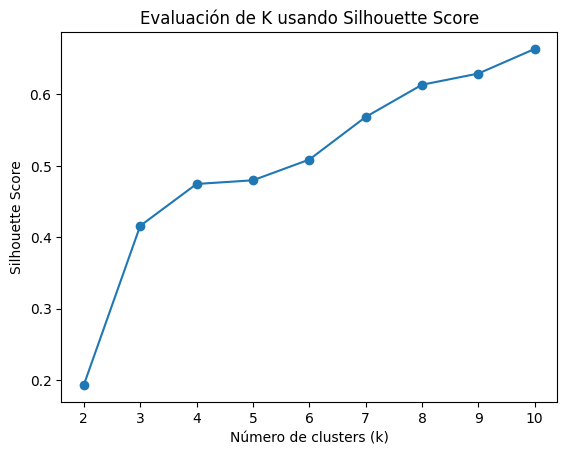

In [11]:
# Evaluar diferentes valores de K usando silhouette_score
from matplotlib import pyplot as plt

scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

silhouette_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_score:.4f}")

# Mostrar resultados
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluación de K usando Silhouette Score')
plt.show()

- el 5 es un buen valor

Text(0.5, 1.0, 'SSE para diferentes valores de k')

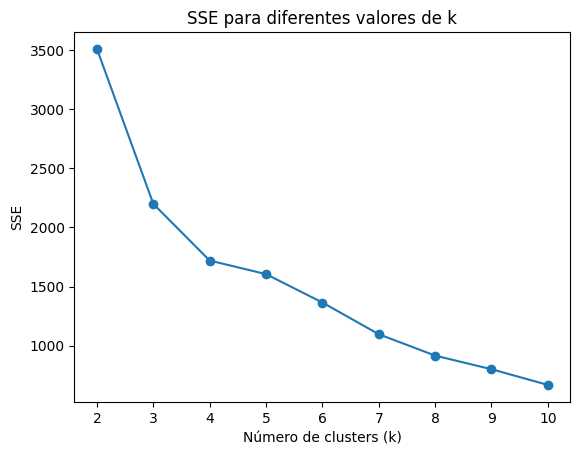

In [12]:
# Sum of squared error (SSE) para cada valor de k
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
# Graficar SSE
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('SSE para diferentes valores de k')

#### Genera el K Means 

Utiliza silhouette_score para evaluar cual es el mejor K

In [13]:
# Evaluar el mejor K utilizando silhouette_score
from sklearn.metrics import silhouette_score as skl_silhouette_score

best_k = None
best_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = skl_silhouette_score(X_scaled, labels)  # Use the renamed function
    if score > best_score:
        best_k = k
        best_score = score

print(f"El mejor valor de K es: {best_k} con un Silhouette Score de: {best_score:.4f}")

El mejor valor de K es: 10 con un Silhouette Score de: 0.6636


In [14]:
# Graficar los clusters óptimos con plt.plot
plt.figure(figsize=(10, 6))
for cluster in df_filtered['cluster_optimo'].unique():
    cluster_data = df_filtered[df_filtered['cluster_optimo'] == cluster]
    plt.plot(cluster_data['rating'], [cluster] * len(cluster_data), 'o', label=f'Cluster {cluster}')

plt.title('Visualización de Clusters Óptimos')
plt.xlabel('Rating')
plt.ylabel('Cluster Óptimo')
plt.legend(title='Clusters')
plt.show()

KeyError: 'cluster_optimo'

<Figure size 1000x600 with 0 Axes>

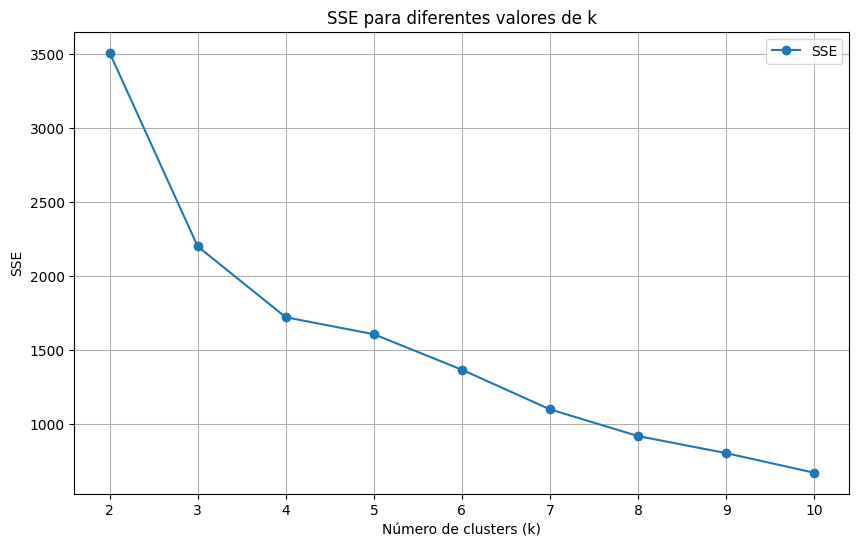

In [ ]:
# Graficar SSE con líneas
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, linestyle='-', marker='o', label='SSE')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('SSE para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()

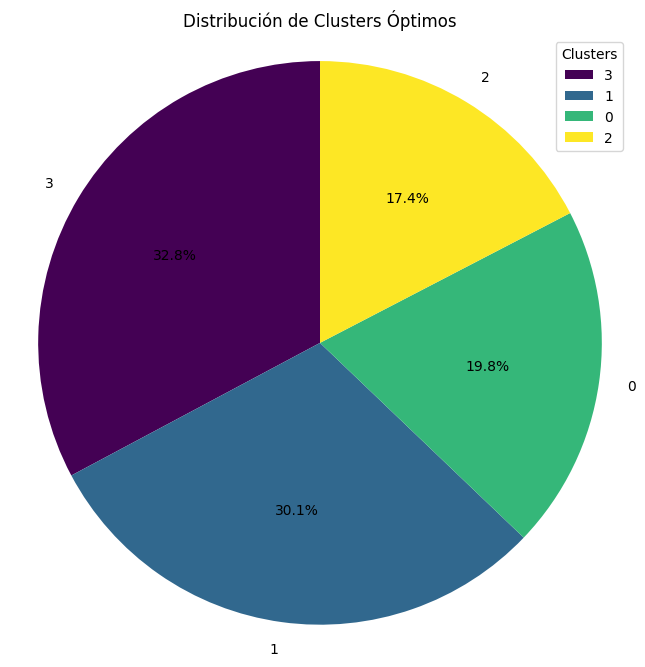

In [ ]:
# Distribución de los clusters óptimos
cluster_counts = df_filtered['cluster_optimo'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_counts)))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Clusters Óptimos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Clusters')
plt.show()


In [ ]:
# Agrupar por cluster_optimo y describir
cluster_describe = df_filtered.groupby('cluster_optimo').describe()

# Mostrar el resultado
cluster_describe

rating                                                cluster  \
                 count      mean       std  min  25%  50%   75%   max   count   
cluster_optimo                                                                  
0                614.0  6.229642  2.308443  1.0  5.0  7.0   8.0  10.0   614.0   
1                934.0  8.629550  2.049710  1.0  8.0  9.0  10.0  10.0   934.0   
2                540.0  2.905556  2.410622  1.0  1.0  2.0   4.0  10.0   540.0   
3               1019.0  8.158979  1.778016  1.0  7.0  8.0   9.0  10.0  1019.0   

                                                             
                    mean       std  min  25%  50%  75%  max  
cluster_optimo                                               
0               2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
1               1.001071  0.032721  1.0  1.0  1.0  1.0  2.0  
2               2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
3               0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

In [ ]:
# Calcular el promedio del Silhouette Score
from sklearn.metrics import silhouette_score as skl_silhouette_score

silhouette_avg = skl_silhouette_score(X_scaled, labels)
print(f"Silhouette Average: {silhouette_avg:.4f}")

Silhouette Average: 0.6636


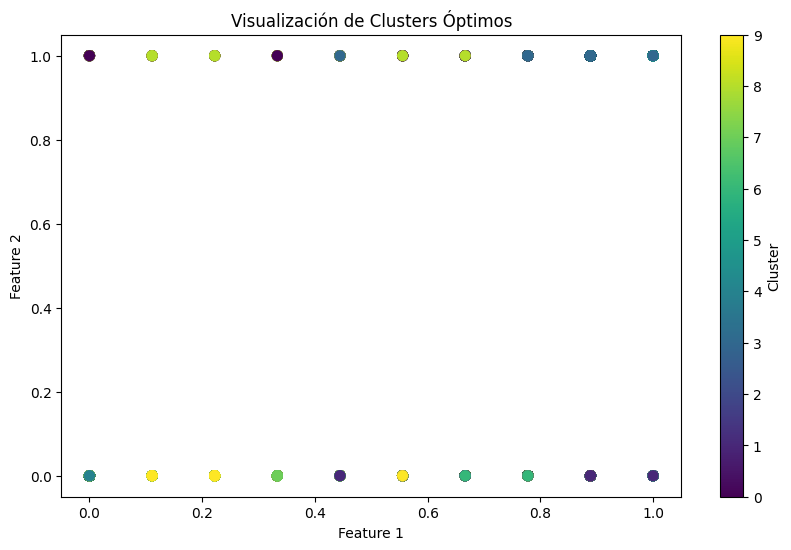

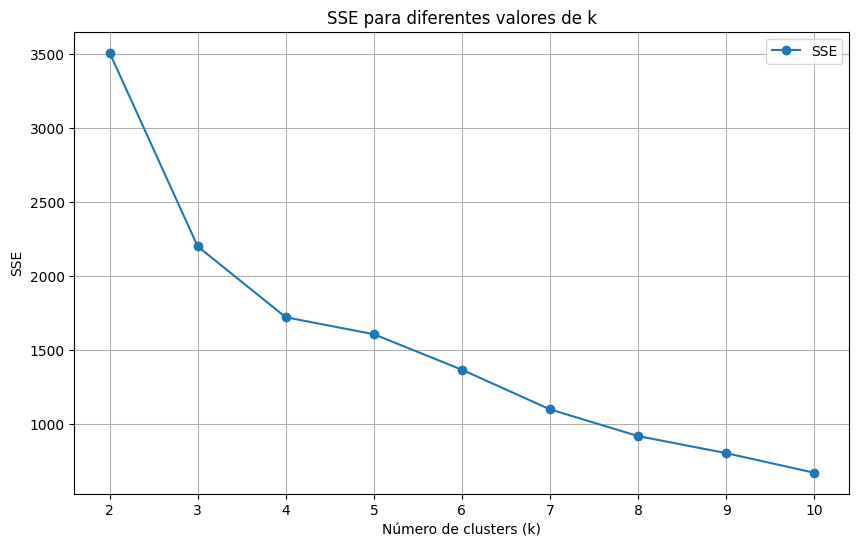

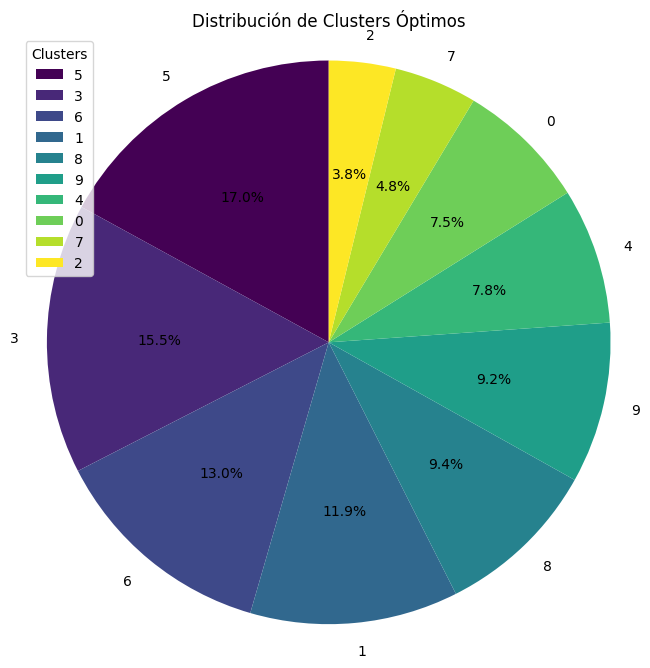

In [15]:
# Graficar los clusters óptimos con plt.scatter
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Visualización de Clusters Óptimos')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Graficar SSE con líneas
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, linestyle='-', marker='o', label='SSE')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('SSE para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()

# Distribución de los clusters óptimos
cluster_counts = pd.Series(labels).value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_counts)))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Clusters Óptimos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Clusters')
plt.show()